Linear Regression

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Load Dataset

In [28]:
# Load the California housing dataset
data = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Print Dimensions in Table

In [29]:
df.shape

(20640, 9)

Display Information

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Describe Statistics Summary

In [31]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Check For Missing Values

In [32]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Visualize Target Variable

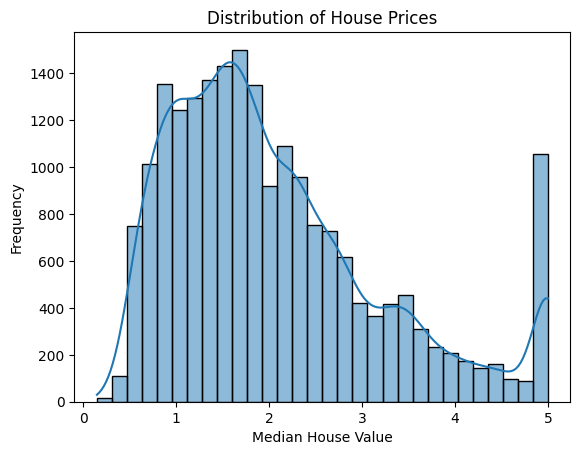

In [33]:
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

Checking Outliers

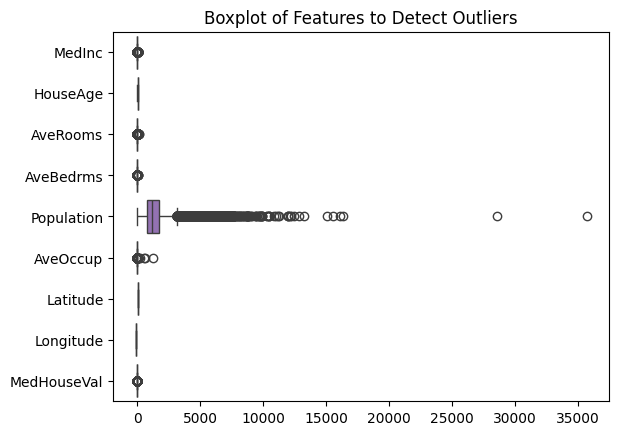

In [34]:
# Boxplots for numerical features
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Features to Detect Outliers')
plt.show()

Remove Outliers

In [35]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from numerical columns
df_cleaned = remove_outliers(df, df.columns[:-1])
print(f'Original dataset size: {df.shape[0]} rows')
print(f'Cleaned dataset size: {df_cleaned.shape[0]} rows')

Original dataset size: 20640 rows
Cleaned dataset size: 16813 rows


Split Dataset into Testing Sets

In [36]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=['MedHouseVal'])
y = df_cleaned['MedHouseVal']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Standard Features

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression Model

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions

In [39]:
y_pred = model.predict(X_test)

Evaluate Model

In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-Squared (R2 Score): {r2:.4f}')

Mean Squared Error (MSE): 0.4169
Root Mean Squared Error (RMSE): 0.6457
Mean Absolute Error (MAE): 0.4845
R-Squared (R2 Score): 0.6449


Plot Actual vs Predicted Values

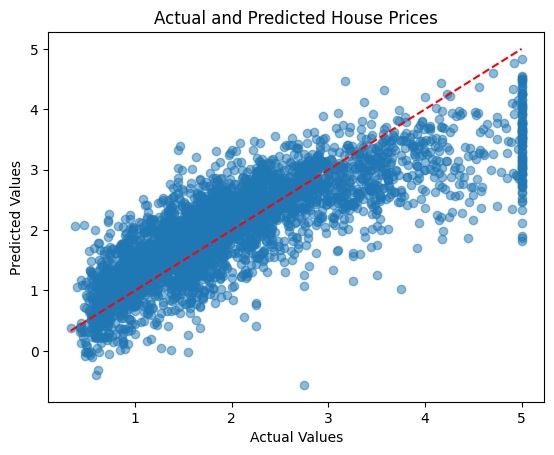

In [41]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual and Predicted House Prices')
plt.show()

Heatmap Correlation

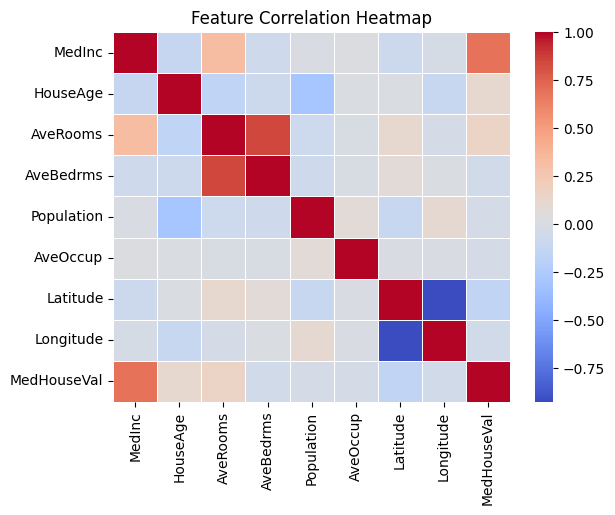

In [42]:
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

Apply Columns Rows and Functions

In [43]:
df.apply(np.count_nonzero)

MedInc         20640
HouseAge       20640
AveRooms       20640
AveBedrms      20640
Population     20640
AveOccup       20640
Latitude       20640
Longitude      20640
MedHouseVal    20640
dtype: int64

Print Columns in Table

In [44]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


Heatmap for missing values

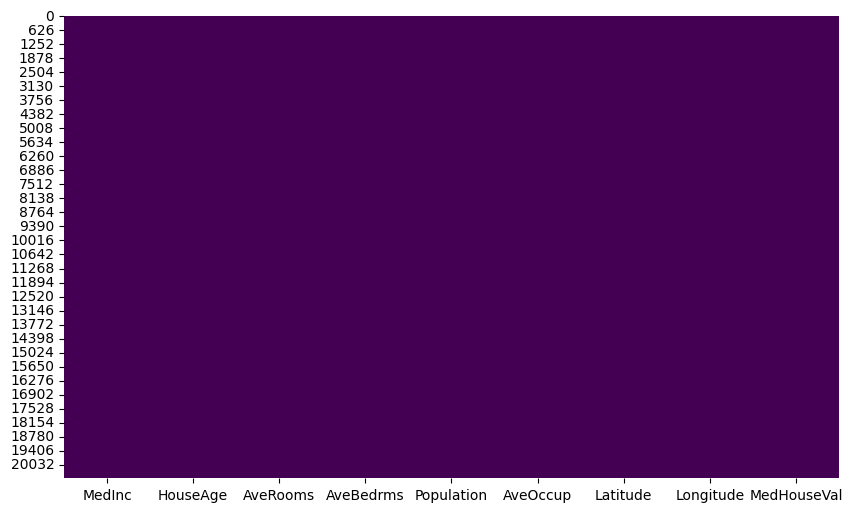

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.show()

Sort By Population

In [46]:
df.sort_values(by="Population", ascending=False).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188
13139,4.9516,3.0,7.338559,1.159015,16305.0,3.043113,38.43,-121.44,1.537
10309,7.4947,4.0,7.311043,1.054346,16122.0,3.106957,33.89,-117.74,3.663
6057,6.0191,8.0,6.347327,1.047525,15507.0,3.070693,34.03,-117.78,2.539


Check Unique Values

In [47]:
df["MedInc"].value_counts()

MedInc
3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
5.6790      1
2.5478      1
1.9559      1
3.7574      1
1.4946      1
Name: count, Length: 12928, dtype: int64

View Data in Table

In [48]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Print Last Ten Rows

In [49]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


Print First Ten Rows

In [50]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Print Index of table

In [51]:
df.index

RangeIndex(start=0, stop=20640, step=1)

Manipulating Data in Table

In [52]:
df.max(axis=0)

MedInc            15.000100
HouseAge          52.000000
AveRooms         141.909091
AveBedrms         34.066667
Population     35682.000000
AveOccup        1243.333333
Latitude          41.950000
Longitude       -114.310000
MedHouseVal        5.000010
dtype: float64

Slice Rows from 10th to 13th position

In [53]:
df[10:14]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
10,3.2031,52.0,5.477612,1.079602,910.0,2.263682,37.85,-122.26,2.815
11,3.2705,52.0,4.772480,1.024523,1504.0,2.049046,37.85,-122.26,2.418
12,3.0750,52.0,5.322650,1.012821,1098.0,2.346154,37.85,-122.26,2.135
13,2.6736,52.0,4.000000,1.097701,345.0,1.982759,37.84,-122.26,1.913
